# Video Frames (Images) to Velocity Fields with OpenPIV 
### Particle Image Velocimetry 

In [1]:
from openpiv import tools, process, validation, filters, scaling 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import imageio

import pandas as pd
import xarray as xr

In [2]:
import openpiv.tools
import openpiv.process 
import openpiv.scaling 
import openpiv.validation 
import openpiv.filters
import glob

# Batch Processing

### check if pictures (frames) are in order, if not, sort them

In [27]:
filepath = '/Users/Jasper/Volc_Research/Workflow_OPENPIV/1_Site_4_Frames/Flight_10'


files = glob.glob(filepath + "/*.jpg")
files

['/Users/Jasper/Volc_Research/Workflow_OPENPIV/1_Site_4_Frames/Flight_10/DJI_0001_20180726_1440-Vpt4postTypeA.MOV_060.jpg',
 '/Users/Jasper/Volc_Research/Workflow_OPENPIV/1_Site_4_Frames/Flight_10/DJI_0001_20180726_1440-Vpt4postTypeA.MOV_074.jpg',
 '/Users/Jasper/Volc_Research/Workflow_OPENPIV/1_Site_4_Frames/Flight_10/DJI_0001_20180726_1440-Vpt4postTypeA.MOV_048.jpg',
 '/Users/Jasper/Volc_Research/Workflow_OPENPIV/1_Site_4_Frames/Flight_10/DJI_0001_20180726_1440-Vpt4postTypeA.MOV_114.jpg',
 '/Users/Jasper/Volc_Research/Workflow_OPENPIV/1_Site_4_Frames/Flight_10/DJI_0001_20180726_1440-Vpt4postTypeA.MOV_100.jpg',
 '/Users/Jasper/Volc_Research/Workflow_OPENPIV/1_Site_4_Frames/Flight_10/DJI_0001_20180726_1440-Vpt4postTypeA.MOV_101.jpg',
 '/Users/Jasper/Volc_Research/Workflow_OPENPIV/1_Site_4_Frames/Flight_10/DJI_0001_20180726_1440-Vpt4postTypeA.MOV_115.jpg',
 '/Users/Jasper/Volc_Research/Workflow_OPENPIV/1_Site_4_Frames/Flight_10/DJI_0001_20180726_1440-Vpt4postTypeA.MOV_049.jpg',
 '/Users

In [28]:
def Frame_sort(x):
    return(x[-7:-4])

files_S =sorted(files, key = Frame_sort)
files_S

['/Users/Jasper/Volc_Research/Workflow_OPENPIV/1_Site_4_Frames/Flight_10/DJI_0001_20180726_1440-Vpt4postTypeA.MOV_000.jpg',
 '/Users/Jasper/Volc_Research/Workflow_OPENPIV/1_Site_4_Frames/Flight_10/DJI_0001_20180726_1440-Vpt4postTypeA.MOV_001.jpg',
 '/Users/Jasper/Volc_Research/Workflow_OPENPIV/1_Site_4_Frames/Flight_10/DJI_0001_20180726_1440-Vpt4postTypeA.MOV_002.jpg',
 '/Users/Jasper/Volc_Research/Workflow_OPENPIV/1_Site_4_Frames/Flight_10/DJI_0001_20180726_1440-Vpt4postTypeA.MOV_003.jpg',
 '/Users/Jasper/Volc_Research/Workflow_OPENPIV/1_Site_4_Frames/Flight_10/DJI_0001_20180726_1440-Vpt4postTypeA.MOV_004.jpg',
 '/Users/Jasper/Volc_Research/Workflow_OPENPIV/1_Site_4_Frames/Flight_10/DJI_0001_20180726_1440-Vpt4postTypeA.MOV_005.jpg',
 '/Users/Jasper/Volc_Research/Workflow_OPENPIV/1_Site_4_Frames/Flight_10/DJI_0001_20180726_1440-Vpt4postTypeA.MOV_006.jpg',
 '/Users/Jasper/Volc_Research/Workflow_OPENPIV/1_Site_4_Frames/Flight_10/DJI_0001_20180726_1440-Vpt4postTypeA.MOV_007.jpg',
 '/Users

### Extract frame 0 and make a list of frames (will use this to save files based off of frame 0)

In [29]:
frame0= files_S[0]
frame0 = int(frame0[-7:-4])
frame0

0

In [30]:
FrameN = []
for i in range(len(files)):
    F1 = str(frame0 +i) #FOR ONE SECOND INTERVALS 
    FrameN.append(F1)
    i = i+1
FrameN

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120']

In [31]:
#Change to desired output directory 
savedir = '/Users/Jasper/Volc_Research/Workflow_OPENPIV/2_Site_4_PIV/F10/'

In [32]:
#List is what the output file names will look like
i=0
for i in range(len(files_S)-1):
    print(savedir  + 'Vel_Field_' + "%03d" %  i + '-' + "%03d" % (i+1) + '.csv' ) 

/Users/Jasper/Volc_Research/Workflow_OPENPIV/2_Site_4_PIV/F10/Vel_Field_000-001.csv
/Users/Jasper/Volc_Research/Workflow_OPENPIV/2_Site_4_PIV/F10/Vel_Field_001-002.csv
/Users/Jasper/Volc_Research/Workflow_OPENPIV/2_Site_4_PIV/F10/Vel_Field_002-003.csv
/Users/Jasper/Volc_Research/Workflow_OPENPIV/2_Site_4_PIV/F10/Vel_Field_003-004.csv
/Users/Jasper/Volc_Research/Workflow_OPENPIV/2_Site_4_PIV/F10/Vel_Field_004-005.csv
/Users/Jasper/Volc_Research/Workflow_OPENPIV/2_Site_4_PIV/F10/Vel_Field_005-006.csv
/Users/Jasper/Volc_Research/Workflow_OPENPIV/2_Site_4_PIV/F10/Vel_Field_006-007.csv
/Users/Jasper/Volc_Research/Workflow_OPENPIV/2_Site_4_PIV/F10/Vel_Field_007-008.csv
/Users/Jasper/Volc_Research/Workflow_OPENPIV/2_Site_4_PIV/F10/Vel_Field_008-009.csv
/Users/Jasper/Volc_Research/Workflow_OPENPIV/2_Site_4_PIV/F10/Vel_Field_009-010.csv
/Users/Jasper/Volc_Research/Workflow_OPENPIV/2_Site_4_PIV/F10/Vel_Field_010-011.csv
/Users/Jasper/Volc_Research/Workflow_OPENPIV/2_Site_4_PIV/F10/Vel_Field_011-

## Batch Process

In [33]:
i=0
for i in range(len(files_S)-1):
    frame_a  = tools.imread(files_S[i])
    frame_b  = tools.imread(files_S[i+1])
    frame_a = (frame_a).astype(np.int32)
    frame_b = (frame_b).astype(np.int32)

    u, v, sig2noise = process.extended_search_area_piv( frame_a, frame_b, \
        window_size=64, overlap=32, dt=1, search_area_size=128, sig2noise_method='peak2peak' )
    x, y = process.get_coordinates( image_size=frame_a.shape, window_size=64, overlap=32 )
    u, v, mask = validation.sig2noise_val( u, v, sig2noise, threshold = 1.2 )
    u, v, mask = validation.global_val( u, v, (-1000, 2000), (-1000, 1000) )
    u, v = filters.replace_outliers( u, v, method='localmean', max_iter=10, kernel_size=2)
    x, y, u, v = scaling.uniform(x, y, u, v, scaling_factor = 1)
    tools.save(x, y, u, v, mask, savedir + 'Vel_Field_' + "%03d" %  i + '-' + "%03d" % (i+1) + '.csv')
    #tools.display_vector_field(savedir + 'Vel_Field_' + FrameN[i]+ '-' + FrameN[i+1] + '.csv', scale=400, width=0.001)
    i =i+1
    

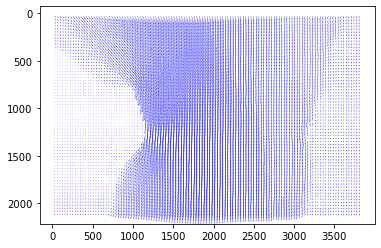

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f93fbc9bac0>)

In [25]:
#does this look reasonable?
tools.display_vector_field(savedir + 'Vel_Field_010-011.csv' , scale=500, width=.0009)